In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras import applications,optimizers
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.models import Model,Sequential
from keras.layers import Dropout, Flatten, Dense,Conv2D,MaxPooling2D
from keras.utils import to_categorical

import numpy as np
from random import shuffle
import cv2
import os
print(os.listdir("../input"))

Using TensorFlow backend.


['anno_train.csv', 'car_data', 'anno_test.csv', 'names.csv']


In [24]:
#training data set directory
traindir = "../input/car_data/car_data/train"
#testing data set directory
testdir = '../input/car_data/car_data/test'
img_width, img_height = 256, 256
learning_rate = 0.001
#train class number
train_class = np.asarray(pd.read_csv('../input/anno_train.csv', header=None).iloc[:,-1])
#test class number
test_class = np.asarray(pd.read_csv('../input/anno_test.csv', header=None).iloc[:,-1])


names = pd.read_csv('../input/names.csv',header=None)

In [25]:
# create the training dataset 
training_data = []
for car_dir in os.listdir(traindir):
        for img in os.listdir(traindir + '/'+ car_dir) :
            srno = int(img.split('.')[0]) - 1
            class_no = train_class[srno]
            path = os.path.join(traindir + '/'+ car_dir,img)
            img = cv2.imread(path)
            img = cv2.resize(img,(img_width,img_height))  
            training_data.append([img , class_no])
np.asarray(shuffle(training_data))

    

array(None, dtype=object)

In [26]:
#create the test dataset
test_data = []
for car_dir in os.listdir(testdir):
        for img in os.listdir(testdir + '/'+ car_dir) :
            srno = int(img.split('.')[0]) - 1
            class_no = test_class[srno]
            path = os.path.join(testdir + '/'+ car_dir,img)
            img = cv2.imread(path)
            img = cv2.resize(img,(img_width,img_height))  
            test_data.append([img , class_no])
np.asarray(shuffle(test_data))

    

array(None, dtype=object)

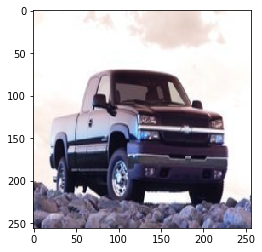

In [27]:
plt.imshow(training_data[5][0])

In [28]:
nb_train_samples = 8144
batch_size = 150
epochs = 10

In [29]:
import sys
# Add directory holding utility functions to path to allow importing utility functions so that model weights can be loaded into utility directory
sys.path.append('/kaggle/input/python-utility-code-for-deep-learning-exercises/utils')

In [30]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

In [31]:
# first 6 layers' weights are fixed
for layer in model.layers[0:6]:
     layer.trainable = False

In [35]:
x = model.output
# output of VGG19 is fed into convolutional layer
x = Conv2D(32,(3,3),activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(196, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

In [36]:
# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [39]:
# split training data into input matrix and output matrix
X=[]
y=[]
for i in range(0,len(training_data)):
    X.append(training_data[i][0])
    y.append(training_data[i][1])
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
#convert the class number into one hot encoded vector
y = to_categorical(y-1,num_classes=196)

In [42]:
# Train the model 
model_final.fit(X, y, batch_size=150, epochs=epochs,  validation_split=0.1)

Train on 7329 samples, validate on 815 samples
Epoch 1/2
7329/7329 [==============================] - 204s 28ms/step - loss: 5.6934 - acc: 0.0064 - val_loss: 5.2784 - val_acc: 0.0061
Epoch 2/2
7329/7329 [==============================] - 201s 27ms/step - loss: 5.2783 - acc: 0.0082 - val_loss: 5.2796 - val_acc: 0.0061


In [43]:
#split test dataset i into test_x and test_y
test_x=[]
test_y=[]
for i in range(0,len(test_data)):
    test_x.append(test_data[i][0])
    test_y.append(test_data[i][1])
test_x = np.asarray(test_x)

In [45]:
# prectict the class of test images in the form of one hot encoded vector
prediction = model_final.predict(test_x[0:5])

In [46]:
#to find the class no of the predicted car
classes = np.argmax(prediction)